In [1]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
BM = ceo.KarhunenLoeve(N_MODE=1000,N_SURF=7)

# Regular grid

In [3]:
def disc(_N_):
    u = np.linspace(-1,1,_N_)
    x,y = np.meshgrid(u,u)
    return np.hypot(x,y)<1

In [4]:
b = BM.load()

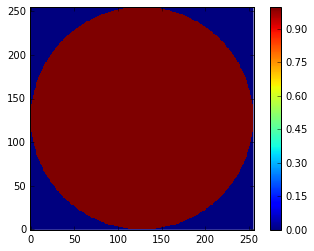

In [5]:
plt.imshow(disc(256)*np.reshape(b.host(),(256,256)),interpolation='none',origin='lower')
plt.colorbar()

In [6]:
NI = 501
di = 1.0425*1.005/(NI-1)
tid = ceo.StopWatch()

In [7]:
def bending_modes_reg(x,N=167):
    di = 1.0425*1.005/(N-1)    
    tid.tic()
    (B,dBdx,dBdy) = BM.interpolate(N,di,x,grid='regular')
    tid.toc()
    M = disc(N)
    print tid.elapsedTime
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(10,10)
    h = ax[0].imshow(M*B.host(),interpolation='none',origin='lower')
    ax[1].imshow(M*dBdx.host(),interpolation='none',origin='lower')
    ax[2].imshow(M*dBdy.host(),interpolation='none',origin='lower')

0.159040004015


<function __main__.bending_modes_reg>

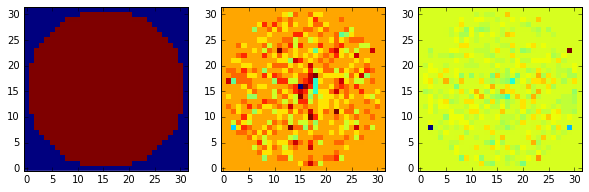

In [8]:
interact(bending_modes_reg,x=widgets.IntSlider(min=1,max=1000,step=1,continuous_update=False),
         N=widgets.IntSlider(min=32,max=501,step=1,continuous_update=False))

# GMT

In [9]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [10]:
gmt = ceo.GMT_MX(M2_mirror_modes=u'Karhunen-Loeve',M2_N_MODE=1000)

In [11]:
n = 8*90+1
src = ceo.Source("R",rays_box_sampling=n,rays_box_size=25.5,rays_origin=[0,0,25])

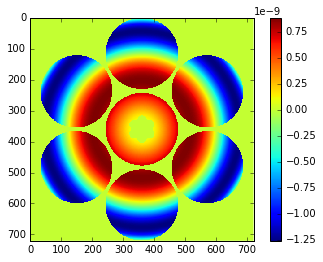

In [12]:
src.reset()
gmt.reset()
gmt.propagate(src)
plt.imshow(src.phase.host(),interpolation='none')
plt.colorbar()

In [13]:
gmt.M2.modes.a.shape

(7, 1000)

In [14]:
%%time
src.reset()
gmt.reset()
gmt.M2.modes.reset()
for k in range(7):
    gmt.M2.modes.a[k,np.random.randint(0,999)]=1e-6
gmt.M2.modes.update()
gmt.propagate(src)

CPU times: user 5.81 s, sys: 3.23 s, total: 9.04 s
Wall time: 8.95 s


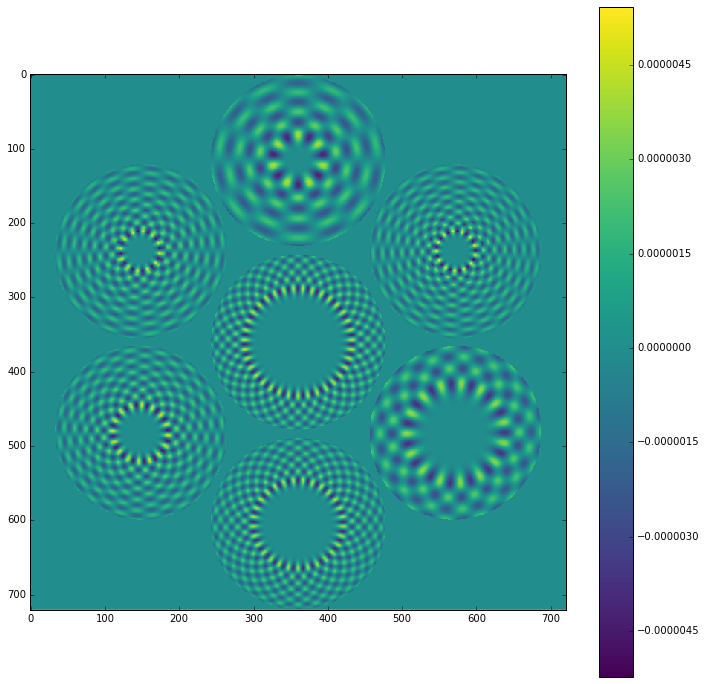

In [15]:
fig = plt.figure()
fig.set_size_inches(12,12)
plt.imshow(src.phase.host(),interpolation='none',cmap='viridis')
plt.colorbar()

In [16]:
nLenslet = 90
wfs = ceo.ShackHartmann(nLenslet,8,25.5/nLenslet)

In [17]:
src.reset()
gmt.reset()
gmt.propagate(src)
wfs.calibrate(src,0.5)

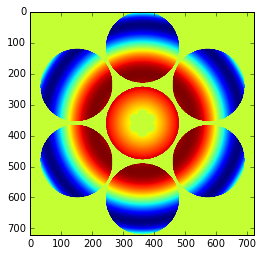

In [18]:
plt.imshow(src.phase.host())

In [19]:
print "WFS pixel scale=%.3farcsec and FOV=%.3farcsec"%(wfs.pixel_scale_arcsec,
                                                       wfs.pixel_scale_arcsec*wfs.frame.shape[0]/nLenslet)

WFS pixel scale=0.233arcsec and FOV=1.864arcsec


[ 79  36 194 200 133  24   3]


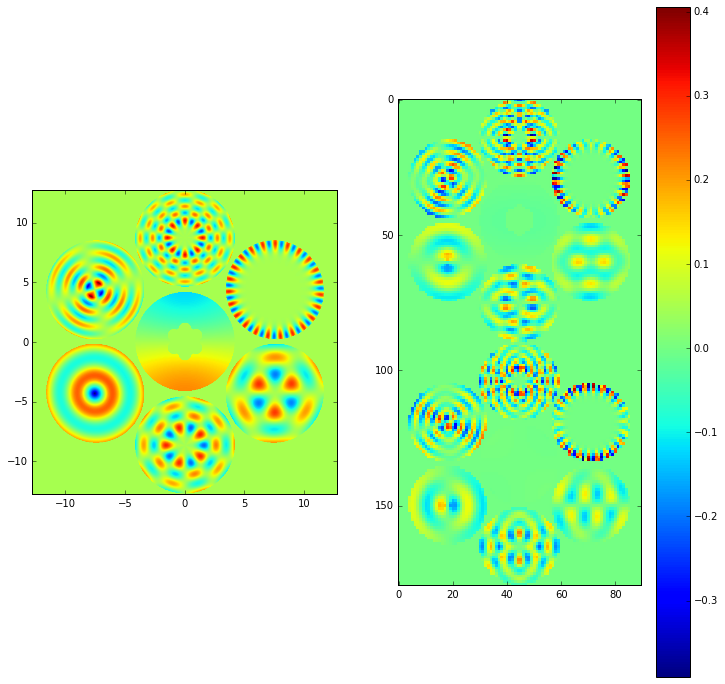

In [20]:
src.reset()
gmt.reset()
gmt.M2.modes.reset()
mode_idx = np.random.randint(1,200,7)
print mode_idx + 1
for k in range(7):
    gmt.M2.modes.a[k,mode_idx[k]]=1e-7
gmt.M2.modes.update()
gmt.propagate(src)
wfs.reset()
wfs.analyze(src)
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(12,12)
axs[0].imshow(src.phase.host(),extent=[-12.75,12.75,-12.75,12.75])
h1 = axs[1].imshow(wfs.c.host(shape=(180,90),units='arcsec'),interpolation='none')
plt.colorbar(h1,ax=axs[1])

In [ ]:
D = gmt.calibrate(wfs,src,mirror='M2',mode='Karhunen-Loeve',stroke=1e-7)

___ M2 ___ (Karhunen-Loeve)
Segment #0: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 